In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "../s0c_prepData_An/db_An_full.xlsx"
df = pd.read_excel(file_path, header=1)

In [3]:
print("All entries count: ", df.shape[0])
print("Unique extractant count: ", len(set(df['SMILES'])))

All entries count:  2989
Unique extractant count:  191


## Analyze the metal

In [4]:
print("Unique metal count: ", len(set(df['Metal'])))

Unique metal count:  13


In [5]:
df['Metal_noOx'] = df['Metal'].str.replace(r'\(.*\)', '', regex=True)

In [6]:
# Get counts of each metal
metal_counts_sort_series = df['Metal_noOx'].value_counts()
metal_counts_sort_series

Metal_noOx
Am    1406
U      547
Th     453
Np     287
Pu     220
Cm      49
Pa      23
Cf       4
Name: count, dtype: int64

In [7]:
An_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
# Use pd.Series to create new Series, and index and value in old Series can match the new Series index and value automatically
metal_counts_pTableOrder = pd.Series(data=metal_counts_sort_series, index=An_list).dropna()
metal_counts_pTableOrder

Th     453.0
Pa      23.0
U      547.0
Np     287.0
Pu     220.0
Am    1406.0
Cm      49.0
Cf       4.0
Name: count, dtype: float64

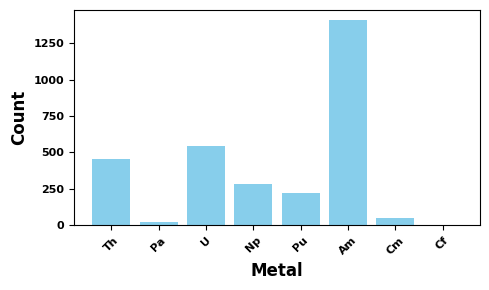

In [8]:
plt.figure(figsize=(5, 3))
plt.bar(metal_counts_pTableOrder.index, metal_counts_pTableOrder.values, color='skyblue')
plt.xlabel('Metal', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

### Metals with Oxidation state

In [9]:
metalNoOx_counts_sort_series = df['Metal'].value_counts()
metalNoOx_counts_sort_series

Metal
Am(III)    1406
U(VI)       547
Th(IV)      453
Pu(IV)      175
Np(V)       165
Np(IV)      100
Cm(III)      49
Pu(VI)       34
Pa(V)        23
Np(VI)       21
Pu(III)      11
Cf(III)       4
Np(III)       1
Name: count, dtype: int64

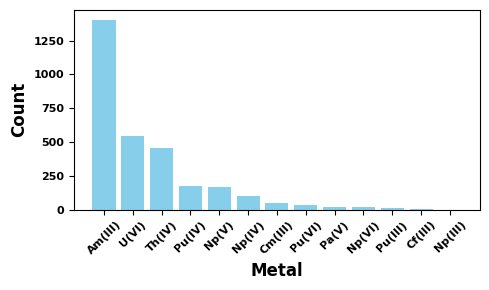

In [10]:
plt.figure(figsize=(5, 3))
plt.bar(metalNoOx_counts_sort_series.index, metalNoOx_counts_sort_series.values, color='skyblue')
# metal_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Metal', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

## Analyze the log D

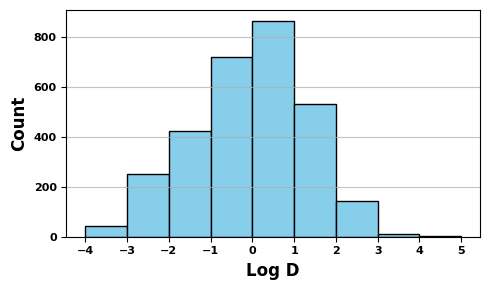

In [11]:
bins = np.arange(-4, 6, 1)

plt.figure(figsize=(5, 3))
plt.hist(df['Log_D'], bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Log D', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(bins, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Analyze the solvents

In [12]:
print("Unique solvent A count: ", len(set(df['Solvent_A'])))
print("Unique solvent B count: ", len(set(df['Solvent_B'].dropna())))
print("Unique solvent A+B count: ", len(set(pd.concat([df['Solvent_A'],df['Solvent_B']]).dropna())))

Unique solvent A count:  34
Unique solvent B count:  4
Unique solvent A+B count:  36


In [13]:
# Get counts of each solvents
solvent_series = pd.concat([df['Solvent_A'],df['Solvent_B']]).dropna()

solvent_counts_sort_series = solvent_series.value_counts()
solvent_counts_sort_series

n-dodecane                        959
1-octanol                         606
hydrogenated tetrapropylene       210
chloroform                        166
kerosene                          160
Tetrachloroethylene               152
1,2-dichloroethane                129
1-dodecanol                       125
nitrobenzene                      114
toluene                           110
phenyl trifluoromethyl sulfone    107
[C4mim][Tf2N]                     102
tetrachloroethane                  87
iso-decanol                        87
1,4-diisopropylbenzene             54
cyclohexanone                      44
SSD70                              36
Solv100                            35
Dichloromethane                    30
tert-butylbenzene                  26
2-Ethyl-1-hexanol                  12
benzene                            10
2-nitrophenyl hexyl ether          10
anisole                             9
Decalin                             9
xylene                              6
n-hexane    